# Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [2]:
df = pd.read_csv("Video Games Sales.csv")

In [3]:
df.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [4]:
df.columns

Index(['index', 'Rank', 'Game Title', 'Platform', 'Year', 'Genre', 'Publisher',
       'North America', 'Europe', 'Japan', 'Rest of World', 'Global',
       'Review'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


In [6]:
df.shape

(1907, 13)

# Data Cleaning

In [7]:
df.isnull().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

### Dropping null values

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

index            0
Rank             0
Game Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64

In [10]:
df.describe()

,index,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,950.716720,951.716720,2003.766773,1.262109,0.710517,0.320980,0.207055,2.500532,79.038243
std,550.234127,550.234127,5.895369,1.967797,1.155922,0.729295,0.345141,3.587041,10.652957
min,0.000000,1.000000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,474.250000,475.250000,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,950.500000,951.500000,2005.000000,0.820000,0.440000,0.020000,0.130000,1.530000,81.095000
75%,1426.750000,1427.750000,2008.000000,1.377500,0.820000,0.307500,0.220000,2.547500,86.265000
max,1906.000000,1907.000000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


# Data Visualization

### Correlation Matrix

<AxesSubplot: >

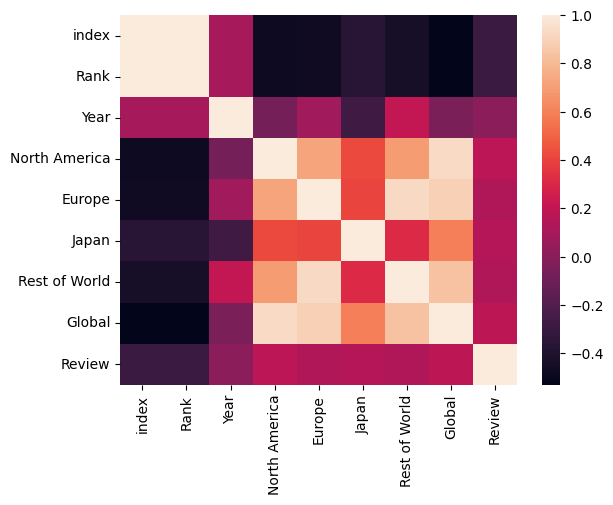

In [11]:
sns.heatmap(df.corr())

# Data Insights / Analytics

### 1. Count of Games in each Genre

In [12]:
games_genre_count = df['Genre'].value_counts()
games_genre_count

Sports          303
Action          272
Shooter         204
Platform        186
Racing          184
Role-Playing    171
Misc            153
Fighting        125
Adventure       105
Simulation       92
Puzzle           44
Strategy         39
Name: Genre, dtype: int64

In [13]:
fig = go.Figure()

fig.add_trace(
    go.Bar(x=games_genre_count.index, y=games_genre_count.values)
)

fig.update_layout(
    title='Count of Games in each Genre',              
    xaxis_title='Genre',
    yaxis_title='Count',
    hovermode='x unified'
)

fig.show()

We are able to visualize that **Sports Genre** has been published more oer the years

### 2. Count of Games on each platform

In [14]:
count_games_platforms = df.groupby('Platform')['Game Title'].nunique().sort_values(ascending=False)

fig = go.Figure()

fig.add_trace(go.Bar(x=count_games_platforms.index, y=count_games_platforms.values))

fig.update_layout(title='Count Unique Games by Platform',
                  xaxis_title='Platform',
                  yaxis_title='Count Games',
                  hovermode='x unified')
fig.show()

PS2, PS and X360 are the top 3 games played across Platforms

### 3. Most selling region

In [15]:
sales_by_category = df[["North America","Europe","Japan","Rest of World","Global"]].sum().sort_values(ascending=False)

# Creating a Chart Using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(x=sales_by_category.index, y=sales_by_category.values))  # Removing Text from Bars

fig.update_layout(title='Sum of sales by country',
                  xaxis_title='Regions',
                  yaxis_title='Sales(millions)',
                  hovermode='x unified')
fig.show()

**North America** has the most sales of Video Games over the years

### 4. Global Sales

In [16]:
global_sales_value = df.groupby('Year')['Global'].sum()

fig = go.Figure()

fig.add_trace(go.Scatter(x=global_sales_value.index, 
                         y=global_sales_value.values,
                         mode='lines+markers',
                         text=[f"{year}: {sales:.2f} million" for year, sales in zip(global_sales_value.index, global_sales_value.values)],
                         hoverinfo='text',
                         marker=dict(size=10)))

fig.update_layout(title='Global Sales Over the Years',
                  xaxis_title='Year',
                  yaxis_title='Global Sales',
)
fig.show()

With respect to Global Sales, there appears to be uptrends and downtrends periodically.

### 5. Growth of sales year over year

In [17]:
global_sales_years = df.groupby('Year')['Global'].sum().reset_index()

global_sales_years['Global_Sales_Growth'] = ((global_sales_years['Global'] - global_sales_years['Global'].shift(1)) 
                                             / global_sales_years['Global'].shift(1) * 100).round()

global_sales_years

,Year,Global,Global_Sales_Growth
0,1983.0,10.96,NaN
1,1984.0,45.66,317.0
2,1985.0,49.57,9.0
3,1986.0,27.17,-45.0
4,1987.0,17.06,-37.0
5,1988.0,42.19,147.0
6,1989.0,62.87,49.0
7,1990.0,46.48,-26.0
8,1991.0,21.41,-54.0
9,1992.0,71.47,234.0


In [18]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=global_sales_years['Year'], 
                         y=global_sales_years['Global_Sales_Growth'],
                         mode='lines+markers', 
                         name='Global Sales Growth'))

fig.update_layout(title='Global Sales Growth Over the Years',
                  xaxis_title='Year',
                  yaxis_title='Global Sales Growth (%)',
                  hovermode='x unified')

fig.show()

Global Sales Growth Percentage has not shown consistent growth over the years

### 6. Sales growth year by year

In [19]:
total_sales_region = df.groupby('Year')[["North America","Europe","Japan","Rest of World","Global"]].sum().reset_index()

for column in ["North America","Europe","Japan","Rest of World","Global"]:
    total_sales_region[f'{column}_Growth'] = (total_sales_region[column] - total_sales_region[column].shift(1)) / total_sales_region[column].shift(1) * 100

#Keeping only the necessary columns
total_sales_region = total_sales_region[["North America","Europe","Japan","Rest of World","Global"]].round()
total_sales_region

,North America,Europe,Japan,Rest of World,Global
0,2.0,0.0,8.0,0.0,11.0
1,32.0,2.0,11.0,1.0,46.0
2,32.0,4.0,12.0,1.0,50.0
3,11.0,3.0,14.0,0.0,27.0
4,5.0,1.0,10.0,0.0,17.0
5,21.0,6.0,14.0,1.0,42.0
6,39.0,7.0,15.0,1.0,63.0
7,24.0,7.0,14.0,1.0,46.0
8,11.0,4.0,6.0,1.0,21.0
9,36.0,13.0,21.0,2.0,71.0


In [20]:
fig = go.Figure()

# Adding charts for each region total sales over the years
# "North America","Europe","Japan","Rest of World","Global"
fig.add_trace(go.Scatter(x=global_sales_years['Year'], y=total_sales_region['North America'], mode='lines', name='North_America_Sales_Growth'))
fig.add_trace(go.Scatter(x=global_sales_years['Year'], y=total_sales_region['Europe'], mode='lines', name='Europe_Sales_Growth'))
fig.add_trace(go.Scatter(x=global_sales_years['Year'], y=total_sales_region['Japan'], mode='lines', name='Japan_Sales_Growth'))
fig.add_trace(go.Scatter(x=global_sales_years['Year'], y=total_sales_region['Rest of World'], mode='lines', name='Rest_of_World_Sales_Growth'))
fig.add_trace(go.Scatter(x=global_sales_years['Year'], y=total_sales_region['Global'], mode='lines', name='Global_Sales_Growth'))

fig.update_layout(title='Sales Growth by Region Over Years',
                  xaxis_title='Year',
                  yaxis_title='Growth Rate (%)',
                  hovermode='x unified')

fig.show()

Sales Growth over years for different regions has shown tremendous growth over the years.

### 7. Top Selling Genre in each region

In [21]:
regions = ["North America","Europe","Japan","Rest of World","Global"]

for region in regions:
    genre_sales = df.groupby('Genre')[region].sum()
    genre_sales = genre_sales.sort_values(ascending=False)

    fig = go.Figure()
    fig.add_trace(go.Bar(x=genre_sales.index, y=genre_sales.values))
    fig.update_layout(title=f'{region} Sales by Genre',
                      xaxis_title='Genre',
                      yaxis_title=f'{region} Sales',
                      hovermode='x unified')
    fig.show()

Majority of the users prefer **Sports Genre** for video games.

### 8. Trend of each genre over the years

In [22]:
df["Genre"].value_counts()

Sports          303
Action          272
Shooter         204
Platform        186
Racing          184
Role-Playing    171
Misc            153
Fighting        125
Adventure       105
Simulation       92
Puzzle           44
Strategy         39
Name: Genre, dtype: int64

In [23]:
genres = [
    "Sports" ,         
    "Action",        
    "Shooter",       
    "Platform",      
    "Racing",     
    "Role-Playing",    
    "Misc",    
    "Fighting",
    "Adventure",       
    "Simulation",     
    "Puzzle",           
    "Strategy" 
]        

fig = make_subplots(rows=6, cols=2, subplot_titles=genres)

for i, genre in enumerate(genres, 1):
    genre_data = df[df['Genre'] == genre]
    
    global_sales_by_year = genre_data.groupby('Year')[['Global']].sum().reset_index()
    
    fig.add_trace(
        go.Scatter( x=global_sales_by_year['Year'], y=global_sales_by_year['Global'],
                    mode='lines+markers', name=genre,showlegend=False),
                    row=(i - 1) // 2 + 1, col=(i - 1) % 2 + 1
    )

fig.update_layout(
    title='Global Sales by Genre Over Years',
    xaxis_title='Year',
    yaxis_title='Global Sales (millions)',
    hovermode='x unified',
    height=1500
)  

fig.show()

The chart shows the global sales of various genre games over the years.

### 9. Unique games over the years

In [24]:
unique_game_counts = df.groupby("Year")['Game Title'].nunique()

fig = go.Figure()

fig.add_trace(
    go.Bar(x=unique_game_counts.index, y=unique_game_counts.values)
)

fig.update_layout(title='Unique Games Count Over Years',
                  xaxis_title='Year',
                  yaxis_title='Count Games',
                  hovermode='x unified')
fig.show()

**2008** has seen the most number of video games released, amounting to **126**.